<a href="https://colab.research.google.com/github/christienatashiaarchie/Pneumonia-Detection/blob/master/Pneumonia_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing import image

%matplotlib inline

In [2]:
# DIR Constants
cwd = os.getcwd()
TRAIN=cwd+'/../Data/DRTrain/'
TEST=cwd+'/../Data/DRTest/'
VAL=cwd+'/../Data/DRValid/'

In [3]:
model = tf.keras.models.Sequential([
  
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(512, 512, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
  
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    # The fifth convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

  
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'), # 512 neuron hidden layer
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for ('pneumonia') clas and 1 for ('covid') class
    tf.keras.layers.Dense(1, activation='sigmoid')
])

2022-01-15 14:30:19.438027: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-15 14:30:19.466609: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fc97c72fe40 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-01-15 14:30:19.466631: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


In [4]:
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics = ['accuracy'])

In [5]:
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
    TRAIN,
    target_size = (512,512),
    batch_size = 32,
    color_mode="rgb",
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    TEST,
    target_size = (512, 512),
    batch_size = 32,
    color_mode="rgb",
    class_mode = 'binary'
)

Found 777 images belonging to 2 classes.
Found 251 images belonging to 2 classes.


In [8]:
history = model.fit(
    train_generator,
    steps_per_epoch = 10,
    epochs = 10,
    validation_data = validation_generator
)

Epoch 1/10
10/10 [==============================] - 153s 15s/step - loss: 0.6552 - accuracy: 0.6875 - val_loss: 0.5238 - val_accuracy: 0.8367
Epoch 2/10
10/10 [==============================] - 141s 14s/step - loss: 0.4890 - accuracy: 0.7710 - val_loss: 0.5027 - val_accuracy: 0.7450
Epoch 3/10
10/10 [==============================] - 137s 14s/step - loss: 0.4520 - accuracy: 0.7980 - val_loss: 0.4275 - val_accuracy: 0.8167
Epoch 4/10
10/10 [==============================] - 145s 15s/step - loss: 0.3695 - accuracy: 0.8219 - val_loss: 0.4596 - val_accuracy: 0.8048
Epoch 5/10
10/10 [==============================] - 139s 14s/step - loss: 0.4935 - accuracy: 0.7750 - val_loss: 0.5278 - val_accuracy: 0.7410
Epoch 6/10
10/10 [==============================] - 146s 15s/step - loss: 0.4833 - accuracy: 0.7469 - val_loss: 0.4299 - val_accuracy: 0.7888
Epoch 7/10
10/10 [==============================] - 144s 14s/step - loss: 0.4572 - accuracy: 0.7844 - val_loss: 0.5919 - val_accuracy: 0.6932
Epoch 

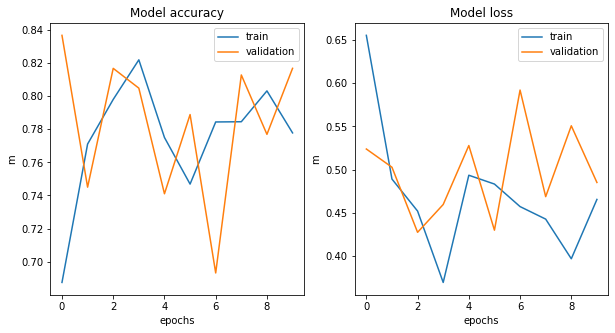

In [10]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,5)

metric = ['accuracy', 'loss']
for i, m in enumerate(metric):
  ax[i].plot(history.history[m])
  ax[i].plot(history.history['val_'+ m])
  ax[i].set_title('Model {}'.format(m))
  ax[i].set_xlabel('epochs')
  ax[i].set_ylabel('m')
  ax[i].legend(['train', 'validation'])
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

In [11]:
# load new unseen dataset
test_datagen = ImageDataGenerator(rescale = 1/255)

test_generator = test_datagen.flow_from_directory(
    VAL,
    target_size = (512, 512),
    batch_size = 1, 
    color_mode="rgb",
    class_mode = 'binary'
)

eval_result = model.evaluate(test_generator)
print('loss rate at evaluation data :', eval_result[0])
print('accuracy rate at evaluation data :', eval_result[1])

Found 264 images belonging to 2 classes.
264/264 [==============================] - 54s 203ms/step - loss: 0.4342 - accuracy: 0.7992
loss rate at evaluation data : 0.4341735541820526
accuracy rate at evaluation data : 0.7992424368858337


[0.]
1.png is DR


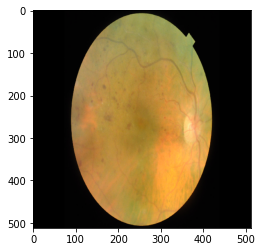

In [12]:
# The file 1.png is DR
tfile = '1.png'
path = '../Data/DRPredict/'+tfile

img = image.load_img(path, target_size=(512,512))
x = image.img_to_array(img)
x = np.expand_dims(x, axis =0)

images = np.vstack([x])
classes = model.predict(images, batch_size = 10)
print(classes[0])
if classes[0]> 0.5:
    print(tfile + ' is Normal')
    plt.imshow(img)
else:
    print(tfile + ' is DR')
    plt.imshow(img)

[1.]
245.png is Normal


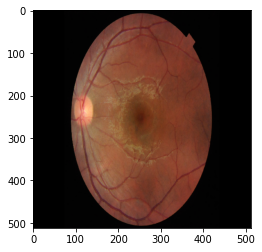

In [13]:
# The file 1.png is DR
tfile = '245.png'
path = '../Data/DRPredict/'+tfile

img = image.load_img(path, target_size=(512,512))
x = image.img_to_array(img)
x = np.expand_dims(x, axis =0)

images = np.vstack([x])
classes = model.predict(images, batch_size = 10)
print(classes[0])
if classes[0]> 0.5:
    print(tfile + ' is Normal')
    plt.imshow(img)
else:
    print(tfile + ' is DR')
    plt.imshow(img)